# CS 6140 Machine Learning: Assignment - 3 (Total Points: 100)
## Prof. Ahmad Uzair 

# Q1. Implement Support Vector Machines (SVMs) from scratch (35 Points)

## 1. Generate and visualize data: 
Run the following code to generate non-linearly separable data. 

In [ ]:
import numpy as np
import random
def gen_data():
    np.random.seed(105)
    Positive = np.concatenate((np.random.randn(10, 2) * 0.4 + [1.5, -0.5],
                             np.random.randn(10, 2) * 0.4 + [-1.5, 0.5]))
    Negative = np.random.randn(20, 2) * 0.3 + [0.0, -0.9]

    return Positive, Negative

## 2. Plot data
Perform data visualization on the above generated data. 


In [ ]:
def plot_date(Positive, Negative):
  pass


Expected output for visualization

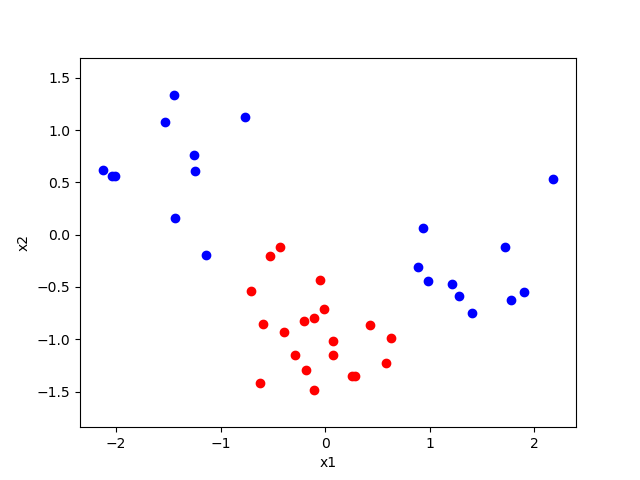

## 3. Fit SVM with linear kernel with slack variable (10+5 Points)
  - Implement **SVM with linear kernel**. Explain why training the linear kernel model without C would fail?  **(10 Points)**
Hint : You can use [minimize()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) of scipy.optimize for optimization of the dual function.  
  $max_\lambda q(λ) = \sum_i \lambda_i - \frac{1}{2}\sum_{ij} y_i y_j \lambda_i \lambda_jk(x_i, x_j)$

  You may need to modify the formulation to convert objective from maximization to minimization.
  $min_\lambda q(λ) = \frac{1}{2}\sum_{ij} y_i y_j \lambda_i \lambda_jk(x_i, x_j) - \sum_i \lambda_i$

  The minimize() function returns a dictionary that contains the optimal values of $\lambda$s stored in 'x' key. 
  - **Optimize slack variable**:  Fit linear kernel using C in [0,1,2,3,4,5]. Explain the effect of different choices of C.  **(5 Points)**


In [ ]:
def linear_kernel(x, y, **kwargs):
    # insert your code here 
    # return linear kernel output
    pass

In [ ]:
def fit(X, Y, C=None, kernel=None, kwargs = {}):
    '''
    X: input_data (Nx2) numpy array
    Y: binary target variable (N,) numpy array
    C: The slack variable
    kernel: kernel function (linear or polynomial)
    kwargs: dictionary of arguments
    '''
    # insert your code here
    # Apply optimization of dual function (Equation 7.10: Bishop)
    # make use of minimize()
    # 
    pass

## 4. Linear Kernel decision boundary visualizaiton (10 Points)
Visualize datapoints and SVM decision boundary and margins with C=5. Color misclassified points appropriately. 
- Implement get_support_vectors() method that return support vectors based on 
- This would require you to implement a predict() method. (Slide 3 or Equation 7.13 : Bishop)




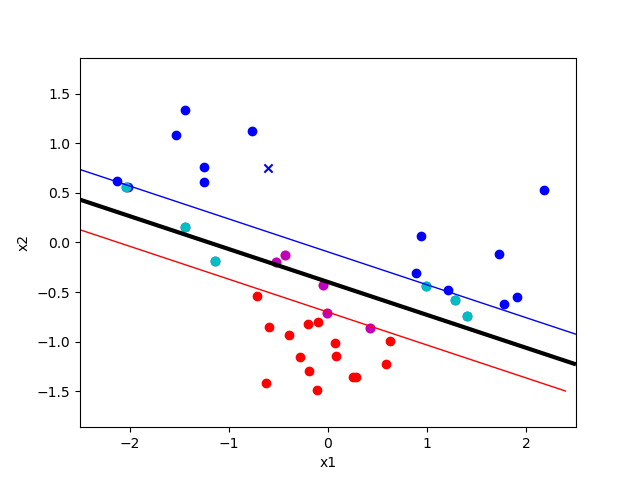

In [ ]:
def get_support_vectors(X, Y, lambdas, threthold=10e-5):
  # insert your code here
  # return support vectors, target variable values of the support vectors, lambdas of support vectoss
  # remeber only lambdas >=0 are to be kept
  pass

In [ ]:
def predict(test_point, s_vecs, s_vecs_Y, s_vecs_lambda, kernel, kwargs):
  '''
  test_point: test datapoint
  s_vecs: Support vectors 
  s_vecs_Y: target values of the Support vectors
  s_vec_lambda: Dual variables corresponding to the support vectors
  kernel, kwargs: kernel function (linear or polynomial)
  '''
  # insert your code here
  # Apply support vectors to predict the class of test_point (Equation 7.13: Bishop)
  pass

In [ ]:
def plot_decision_boundary(Positive, Negative,
                           ip_new,
                           s_vecs, s_vecs_Y, s_vec_lambda,
                           kernel, kwargs):
  '''
  Positive, Negative: Example datapoints from both classes
  test_point: test data point (2, )
  s_vecs: Support vectors
  s_vecs_Y: Target variable values for the support vectors
  s_vec_lambda: Dual variables corresponding to the support vectors
  kernel, kwargs: kernel function (linear or polynomial)
  '''
  # make use of plt.contour() and plt.scatter()
  # plot decision boundary along with margins
  pass

The following function will be used to test your solution.

In [ ]:
# Test code
if __name__ == '__main__':
    Positive, Negative = gen_data()
    plot_data(Positive, Negative)
    X = np.concatenate((Positive, Negative))
    target_data = np.concatenate((np.ones(Positive.shape[0]), -np.ones(Negative.shape[0])))
    size = X.shape[0]
    shuffle_data = list(range(size))
    random.shuffle(shuffle_data)
    X = X[shuffle_data, :]
    Y = Y[shuffle_data]

    lambdas = fit(X,
                Y,
                C=5, # slack variable
                kernel=linear_kernel,
                kwargs={})
    # Get the alpha values for the support vectors, as well as their target data.
    s_vecs, s_vecs_Y, s_vecs_lambda = get_support_vectors(X,
                                                         Y,
                                                         lambdas)
    print(f"{s_vecs.shape[0]} support vectors found.\\n", s_vecs)
    # test new data point
    ip_new = np.array([-0.6, 0.75])
    prediciton = predict(ip_new,
                         s_vecs,
                         s_vecs_Y,
                         s_vecs_lambda,
                         kernel=linear_kernel,
                         kwargs={})

    plot_decision_boundary(  Positive, Negative,
                             ip_new,
                             s_vecs,
                             s_vecs_Y,
                             s_vecs_lambda,
                             kernel=linear_kernel,
                             kwargs={})


## 5. SVM with polynomial kernel.  (10 Points)
Implement polynomial kernel function. Fit the same data with polynomial of degree 2.


In [ ]:
def polynomial_kernel(x, y, **kwargs):
  # insert your code here
  # return polynomial kernel output
  pass


The following functions are to be used to test your implementation.

In [ ]:
def test_polynomial_kernel(X, Y):
    kernel = polynomial_kernel
    kwargs = {'p': 2}
    lambdas = fit(X,
                  Y,
                  C=None,  # slack variable
                  kernel=kernel,
                  **kwargs)
    # Get the alpha values for the support vectors, as well as their target data.
    s_vecs, s_vecs_Y, s_vecs_alpha = get_support_vectors(X,
                                                         Y,
                                                         lambdas)
    ip_new = np.array([-0.6, 0.75])
    prediciton = predict(ip_new,
                         s_vecs,
                         s_vecs_Y,
                         s_vecs_alpha,
                         kernel=kernel,
                         **kwargs)
    plot_decision_boundary(Positive, Negative,
                           ip_new,
                           s_vecs,
                           s_vecs_Y,
                           s_vecs_alpha,
                           kernel=kernel,
                           **kwargs)
if __name__ == '__main__':
    Positive, Negative = gen_data()
    # plot_data(Positive, Negative)
    X = np.concatenate((Positive, Negative))
    Y = np.concatenate((np.ones(Positive.shape[0]), -np.ones(Negative.shape[0])))
    size = X.shape[0]
    shuffle_data = list(range(size))
    random.shuffle(shuffle_data)
    X = X[shuffle_data, :]
    Y = Y[shuffle_data]

    # test_linear(X, Y)
    test_polynomial_kernel(X, Y)

Expected output.

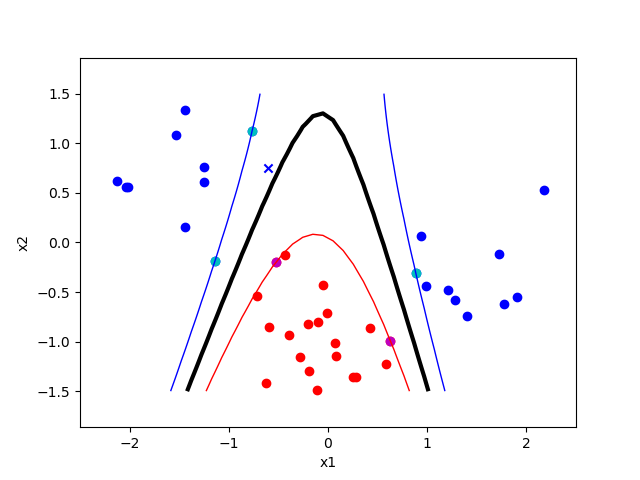

# Q2. Neural Networks (25 Points)

1. Forward Propagation : Find the value of L (7 points)
2. Backward Propagation: Find all the derivatives(of all xi,x2,y1,y2,z2,z2,z) wrt to each inputs and weights (18 points)

Consider the weights as shown below

![ANN.jpg](attachment:ANN.jpg)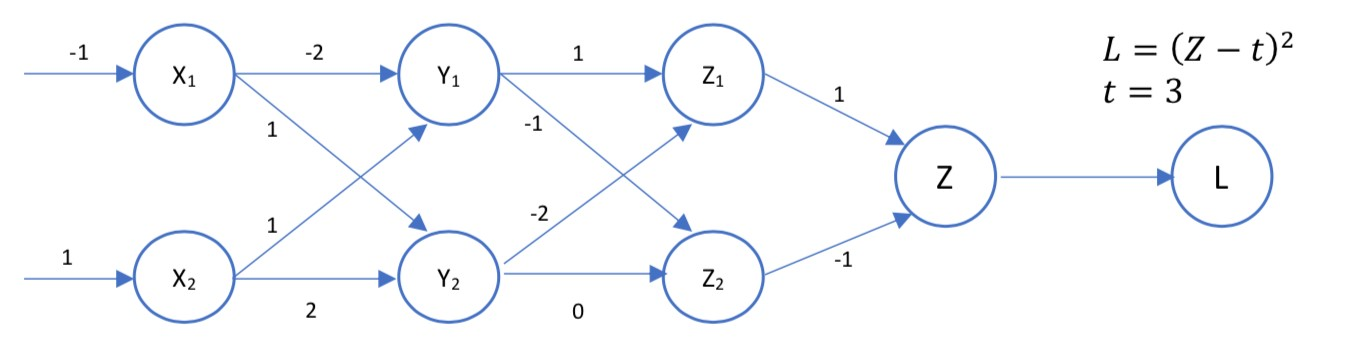

# Q3.Understanding Random Forest Classifier (40 Points)

1. Build a Random Forest classifier for the [handwritten digits dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits/) and find its performance (classification report, confusion matrix) (3 Points)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.datasets import load_digits
digits = load_digits()

2. Investigate following parameters of Random Forest classifier and tune them using Randomized Search and Grid Search. (15 points)
- Number of nodes per tree
- Number of trees
- Depth of trees
- Minimum Samples to split
- Minumum Samples in leaf

Use seed 1 and split the data into 80/20 train/val sets. Traing a classifier with each unique configuration and record train/val accuracy, precision and recall in the results dataframe. This dataframe will have 5 columns (each corresponding to tuning parameter) and each row will correspond to each unique configuration. 5x5x5x5x5 rows. 

Visualize the results dataframe using [parallel coordinates](https://pandas.pydata.org/docs/reference/api/pandas.plotting.parallel_coordinates.html). You will create a column in results dataframe that contains label of each row. Create labels according to accuracy score 50-60 (D), 60-70 (C), 70-80 (B), 80-90 (A), 90+ (A+). These labels will be required for parallel coordinates plot.

Analyze of the impace of each tuning parameter on predictor performance.


In [7]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

# The paramater values are only suggestive. You can come up with better choices.

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 8, 11, 14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]


3. From the results of the above find the best estimators and use them for classifcation once again and evaluate the performance using 10 fold cross validation. (10 Points)

4. Describe what is the difference between Randomized Search and Grid Search (4 points)


5. Why do we have to perfrom cross validation (3 points)



6. Explain how each of the parameters of Random Forest considered effect the performance (5 points)